## Session 1: Introduction to Derivatives

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact


Geometrically, the derivative of a function give the gradient of the tangent line at $x$

(-2.0, 1.5)

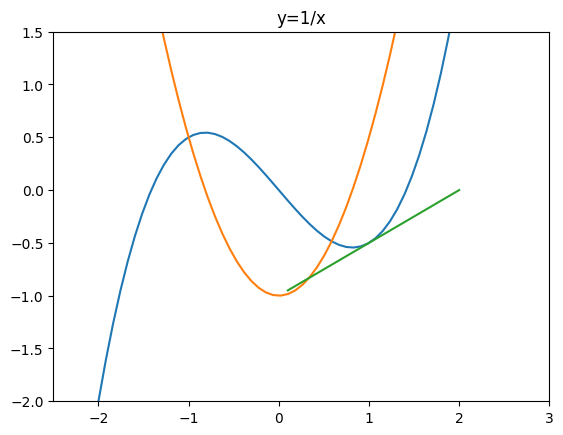

In [2]:
# the function
def f(x):
    return 0.5 * (x ** 3) - x

# the derivative of f(x)
def f_der(x):
    return 1.5 * (x ** 2) - 1

# the intercept (c) of the tangent line in the form y = mx + c
def tangent_intercept(x):
    return f(x) - f_der(x) * x

# line funnction
def line(m, c, z):
    return m*z + c

x = np.linspace(-2, 6, 100)
y = f(x)

# points for the tangent
z = np.linspace(0.1, 2, 100)


tangent_line = line(m = f_der(1), c = tangent_intercept(1), z = z)
fig, ax = plt.subplots()

ax.plot(x,y)
ax.plot(x,f_der(x))
ax.plot(z, tangent_line)
# ax.tick_params(labelbottom = False, labelleft = False, bottom=False, left = False)
ax.set_title("y=1/x")
ax.set_xlim(-2.5, 3)
ax.set_ylim(-2, 1.5)

The intecept (c) for the tangent line for $f(x)$ can be found like so:

The tangent line of $f(x)$ can be written in the form of $t(z) = f'(x)z + c$

As $t(z)$ and $f(x)$ intecept, at $x$ there is a point where:
$f(x) = f'(x)x + c $

as $ z = x $

therefore:
$ c = f(x) - f'(x)x$ 

$c$ can be calculated in python with

```python
def tangent_intercept(x):
    return f(x) - f_der(x) * x
```




But how do we derive the gradient? Consider the following image:

In [8]:
def plot_tangent(x):

    z = np.linspace(-10, 10, 100)
    y = f_der(x) * z + tangent_intercept(x)
    plt.plot(z, y)

def secant_line_m_c(p1, p2):
    x1, y1 = p1
    x2, y2 = p2

    dy = (y2 - y1) 
    dx = (x2 - x1)
    if dx == 0:
        # just moves the line out of the way
        return (0,100)
    
    m = dy / dx
    c = y1 - m * x1

    return(m,c)

def plot_line(mc):

    m, c = mc
    x = np.linspace(-10,10, 100)
    y = m * x + c
    plt.plot(x,y)

def plot_secant_aprox(x1, dx):
    fig, ax = plt.subplots()

    y1 = f(x1)

    x2 = x1 + dx
    y2 = f(x2)
    point_1 = (x1, y1) 
    point_2 = (x2, y2) 

    points = np.array([point_1, point_2]).T

    ax.plot(x,f(x))
    ax.plot(x, f_der(x))
    ax.scatter(points[0], points[1], marker='o')
    ax.set_xlim(-2.5, 3)
    ax.set_ylim(-2, 1.5)
    plot_tangent(x1)
    plot_line( 
        secant_line_m_c(
            (x1,y1), (x2, y2) 
        ) 
    )
    

interact(plot_secant_aprox, 
            dx=widgets.FloatSlider(value=3, min=-6, max=5, step=0.05),
            x1=widgets.FloatSlider(value=3, min=-2.5, max=3, step=0.05)
        )


interactive(children=(FloatSlider(value=3.0, description='x1', max=3.0, min=-2.5, step=0.05), FloatSlider(valu…

<function __main__.plot_secant_aprox(x1, dx)>

Notice that as $dx$ becomes smaller, the secant line tends towards the same gradient as the tangent line. So if we calculate the gradient of the secant line, we can find the derivative of $f$.

Also notice that near the roots of $f(x)$ the gradient of the secant line is much more sensitve to changes in $ dx $, meaning you need a small $dx$ to get an accurate estimate for the tangent line at the roots. This is because $dy$ will grow at a faster rate than $dx$, wereas near the inflection points the grow at a similar rate; imagine zooming in and seeing what $f(x)$ looks like.

The gradient will equal $ \frac {dy}{dx} $

$ dy = y_2 - y_1 = f(x + dy) - f(x) $

Therefore 

$ f'(x) = \lim_{dx \to 0} \frac{f(x + dy) - f(x)}{dx} $
